Downloading...
From: https://drive.google.com/uc?id=143Dq20WEG1WATHUzcIjTVJeVBDQRho_6
To: C:\Users\shrey\Dataset09-Employee-salary-prediction.csv
100%|███████████████████████████████████████████████████████████████████████████████| 179k/179k [00:00<00:00, 1.01MB/s]


Column names in the dataset:
Index(['Position', 'Location', 'Gender', 'Education', 'Experience (Years)',
       'Salary'],
      dtype='object')
First few rows of the dataset:
                            Position   Location  Gender    Education  Experience (Years)   Salary
0  QNXT Configuration QA/Testing SME  Ghaziabad  Female  B.Tech/B.E.                  11  2014510
1           Provider Data Management  New Delhi  Female  B.Tech/B.E.                  24  1624349
2          Accessibility Engineer QA      Noida  Female          BCA                  25  1926223
3           Senior Software Engineer  Jalandhar    Male          NaN                  27  2403560
4         Java Developer/Spring Boot     Meerut    Male          B.A                  11  1128404


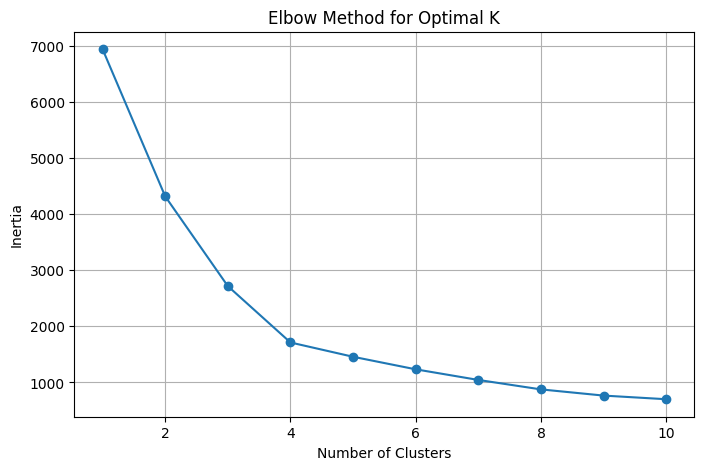

<Figure size 1000x600 with 0 Axes>

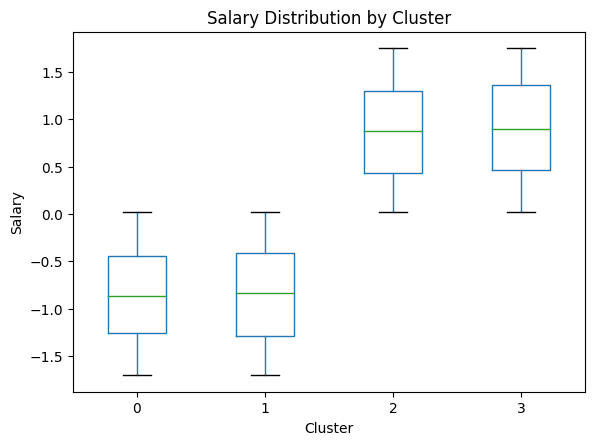

Final DataFrame with clusters:
                            Position    Salary  Experience (Years)  Cluster
0  QNXT Configuration QA/Testing SME  0.912469           -0.813316        3
1           Provider Data Management  0.236995            1.061433        2
2          Accessibility Engineer QA  0.759620            1.205645        2
3           Senior Software Engineer  1.586020            1.494068        2
4         Java Developer/Spring Boot -0.621621           -0.813316        0


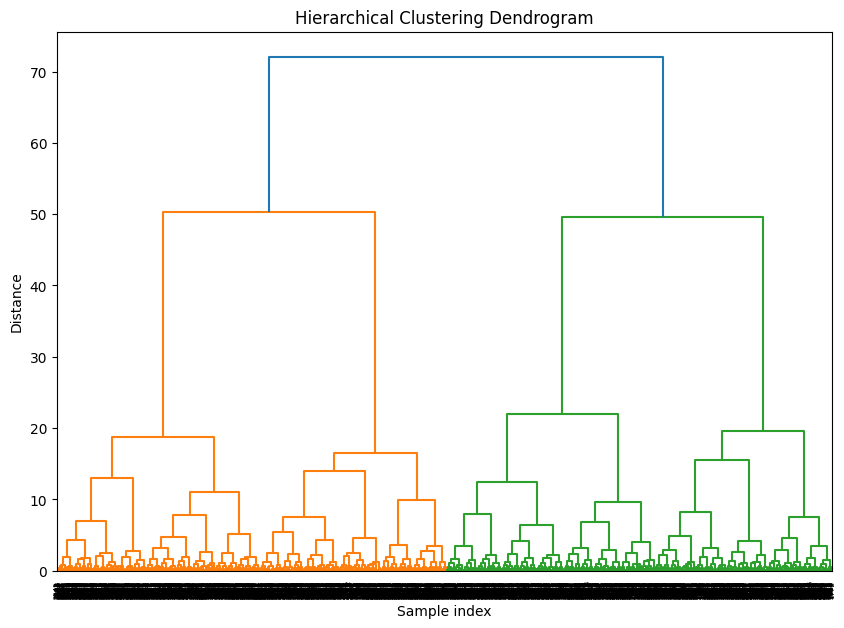

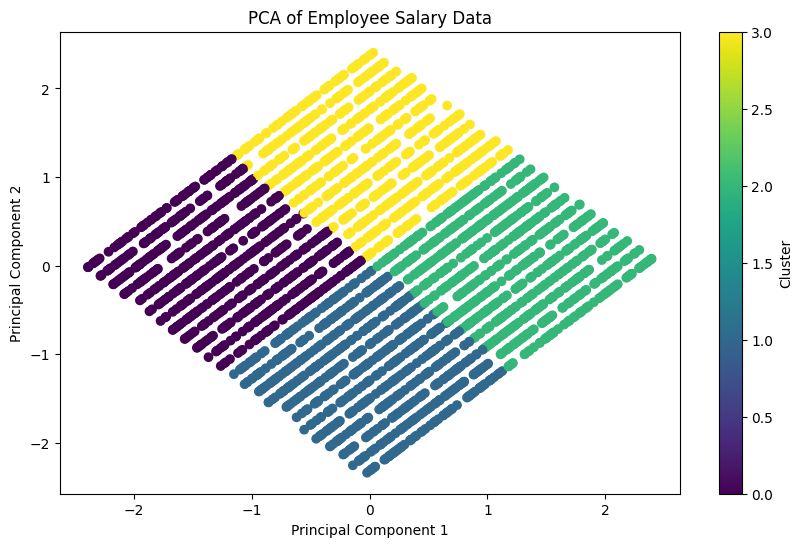

In [37]:
import gdown
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
import os

# Set environment variable to limit threads for better performance
os.environ["OMP_NUM_THREADS"] = "1"

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Step 1: Download the dataset
file_id = '143Dq20WEG1WATHUzcIjTVJeVBDQRho_6'
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'Dataset09-Employee-salary-prediction.csv', quiet=False)

# Step 2: Load the dataset
df = pd.read_csv('Dataset09-Employee-salary-prediction.csv', encoding='ISO-8859-1')

# Print the column names to check for issues
print("Column names in the dataset:")
print(df.columns)

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Step 3: Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Step 4: Data Preprocessing
# Fill missing values in the 'Education' column
df.fillna({'Education': 'Unknown'}, inplace=True)

# Check if the expected columns exist
expected_columns = ['Salary', 'Experience (Years)']  # Adjust this based on the actual column names
missing_columns = [col for col in expected_columns if col not in df.columns]

if not missing_columns:
    # Normalize numerical features
    scaler = StandardScaler()
    df[['Salary', 'Experience (Years)']] = scaler.fit_transform(df[['Salary', 'Experience (Years)']])
else:
    print(f"Missing columns: {missing_columns}. Please check the dataset.")

# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['Position', 'Location', 'Gender', 'Education'], drop_first=True)

# Step 5: K-means Clustering
# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_encoded[['Salary', 'Experience (Years)']])
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid()
plt.show()

# Fit K-means with the optimal number of clusters (choose based on the elbow plot)
optimal_k = 4  # Example: choose based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_encoded[['Salary', 'Experience (Years)']])

# Step 6: Visualize Salary Distribution by Cluster using a Box Plot
plt.figure(figsize=(10, 6))
df.boxplot(column='Salary', by='Cluster', grid=False)
plt.title('Salary Distribution by Cluster')
plt.suptitle('')  # Suppress the default title to clean up the plot
plt.xlabel('Cluster')
plt.ylabel('Salary')
plt.show()

# Optionally, display the final DataFrame with clusters
print("Final DataFrame with clusters:")
print(df[['Position', 'Salary', 'Experience (Years)', 'Cluster']].head())

# Step 7: Optional - Hierarchical Clustering Visualization
linked = linkage(df_encoded[['Salary', 'Experience (Years)']], 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Step 8: Optional - PCA for Visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_encoded[['Salary', 'Experience (Years)']])
df['PCA1'] = principal_components[:, 0]
df['PCA2'] = principal_components[:, 1]

plt.figure(figsize=(10, 6))
plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], cmap='viridis', marker='o')
plt.title('PCA of Employee Salary Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()